In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [7]:
import re
import string

In [8]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

#### Convert Uppercase to Lowercase

In [9]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### Remove Links

In [11]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data['tweet'].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### Remove Punctuations

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [15]:
data['tweet'].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [16]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### Remove Numbers

In [17]:
data['tweet'] = data['tweet'].str.replace('\d+', '', regex = True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Chamashi\AppData\Local\Temp\ipykernel_27832\1148161372.py:1: SyntaxWarning: invalid escape sequence '\d'
  data['tweet'] = data['tweet'].str.replace('\d+', '', regex = True)


In [18]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### Remove Stopwords

In [19]:
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nltk 

In [21]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [23]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [25]:
data['tweet'].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

#### Stemming

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [27]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [28]:
data['tweet'].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [29]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [30]:
from collections import Counter
vocab = Counter()

In [31]:
vocab

Counter()

In [32]:
for sentence in data ['tweet']:
    vocab.update(sentence.split())

In [33]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [34]:
len(vocab)

15949

In [35]:
data.shape

(7920, 3)

In [36]:
tokens = [key for key in vocab if vocab[key] > 10]

In [37]:
len(tokens)

1145

In [38]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Devide Dataset

In [39]:
X = data['tweet']
y = data['label']

In [40]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
X_train

2037    wifey new husband samsung samsungfanat galaxyt...
3885    appl pie make tree life cafe bakeri downtown f...
4633                    phone updat nearli five hour work
7518    ubertwitt iphon rocksmyworld got u iphon get a...
4520           cute littlesist took pic iphon famili sibl
                              ...                        
2667    follow capetownsup instagram sup surf fun cape...
6296    rt alibak okay im go reestablish much love iph...
3652    also wolfgangwolf go fuck say one goddamn fuck...
2361    haha nice graphic new game fun adventur appl i...
3939                           arualcampbel noth rear end
Name: tweet, Length: 6336, dtype: object

In [43]:
X_test

5993    photo perribuck baywatch styleee pretti cute g...
7859    splash goodnight photo pictur photograph maçã ...
5615    appl day keep doctor away ipodshuffl appl red ...
4604    switch att got galaxi woot galaxi samsung new ...
7530    im get macbook air saturday bitch suck non exi...
                              ...                        
3734    abl get new updat due lack storag appl youreth...
1435    iphon cost job thank appl make liter shittiest...
292     gain follow rt must follow follow back follow ...
5464    oomf listen favorit music check … perfect ipod...
334                         get new ipad one care map mac
Name: tweet, Length: 1584, dtype: object

### Vectorization

In [44]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[1] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [45]:
vectorized_x_train = vectorizer(X_train, tokens)

In [46]:
vectorized_x_test = vectorizer(X_test, tokens)

In [47]:
vectorized_x_train

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [48]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [49]:
y_train.value_counts()

label
0    4708
1    1628
Name: count, dtype: int64

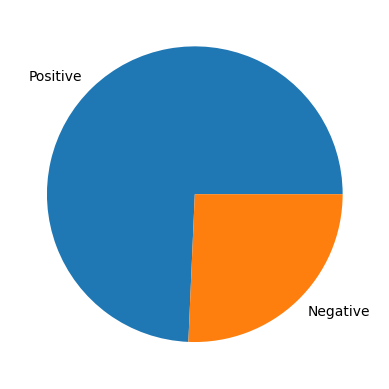

In [50]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show()

### Handling Imbalanced Dataset

In [51]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9416, 1145) (9416,)


In [53]:
y_train_smote.value_counts()

label
0    4708
1    4708
Name: count, dtype: int64

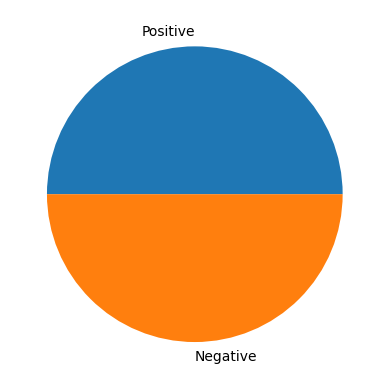

In [54]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show()

In [55]:
vectorized_x_train_smote

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9416, 1145), dtype=float32)

In [56]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
9411    1
9412    1
9413    1
9414    1
9415    1
Name: label, Length: 9416, dtype: int64

In [57]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [58]:
y_test

5993    0
7859    0
5615    0
4604    0
7530    0
       ..
3734    1
1435    1
292     0
5464    0
334     1
Name: label, Length: 1584, dtype: int64

## Model Training and Evaluating

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: \n Accuracy = {acc}\n Precision = {pr}\n Recall = {rec}\n F1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores: \n Accuracy = {acc}\n Precision = {pr}\n Recall = {rec}\n F1-Score = {f1}')

### Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = lr.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores: 
 Accuracy = 0.518
 Precision = 0.51
 Recall = 0.976
 F1-Score = 0.67
Testing Scores: 
 Accuracy = 0.283
 Precision = 0.255
 Recall = 0.967
 F1-Score = 0.404


### Multinomial Naive Bayes

In [62]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = mnb.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores: 
 Accuracy = 0.5
 Precision = 0.0
 Recall = 0.0
 F1-Score = 0.0
Testing Scores: 
 Accuracy = 0.749
 Precision = 0.0
 Recall = 0.0
 F1-Score = 0.0


C:\Users\Chamashi\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Chamashi\Desktop\Sentiment_Analysis_Project\env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### Decision Tree

In [63]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = dt.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores: 
 Accuracy = 0.518
 Precision = 0.51
 Recall = 0.976
 F1-Score = 0.67
Testing Scores: 
 Accuracy = 0.283
 Precision = 0.255
 Recall = 0.967
 F1-Score = 0.404


### Random Forest

In [64]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = rf.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores: 
 Accuracy = 0.518
 Precision = 0.51
 Recall = 0.976
 F1-Score = 0.67
Testing Scores: 
 Accuracy = 0.283
 Precision = 0.255
 Recall = 0.967
 F1-Score = 0.404


### Support Vector Machine

In [65]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
training_scores(y_train_smote, y_train_pred)

y_test_pred = svm.predict(vectorized_x_test)
validation_scores(y_test, y_test_pred)

Training Scores: 
 Accuracy = 0.518
 Precision = 0.51
 Recall = 0.976
 F1-Score = 0.67
Testing Scores: 
 Accuracy = 0.283
 Precision = 0.255
 Recall = 0.967
 F1-Score = 0.404


In [66]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)